In [31]:
%pylab inline

import pandas as pd

data = pd.read_excel("STRReview-UTRAnalysis.xlsx", sheet_name="Compare")
species = set(data["name"])

Populating the interactive namespace from numpy and matplotlib


# STR enrichment in exon/utr

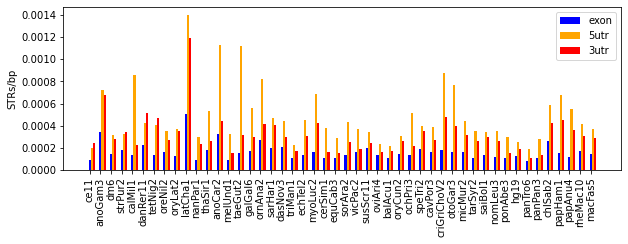

In [32]:
fig = plt.figure()
fig.set_size_inches((10, 3))
ax = fig.add_subplot(111)
xvals = range(data.shape[0])
w = 0.2
ax.bar(xvals, data["exon"], color="blue", width=w, label="exon")
ax.bar([item+w for item in xvals], data["5utr"], color="orange", width=w, label="5utr")
ax.bar([item+2*w for item in xvals], data["3utr"], color="red", width=w, label="3utr");
#ax.bar([item+3*w for item in xvals], data["genome"], color="gray", width=w, label="GW");

ax.legend(loc="upper right")
ax.set_xticks(xvals)
ax.set_xticklabels(data["name"], rotation=90);
ax.set_ylabel("STRs/bp");

# STR composition in exon/utr

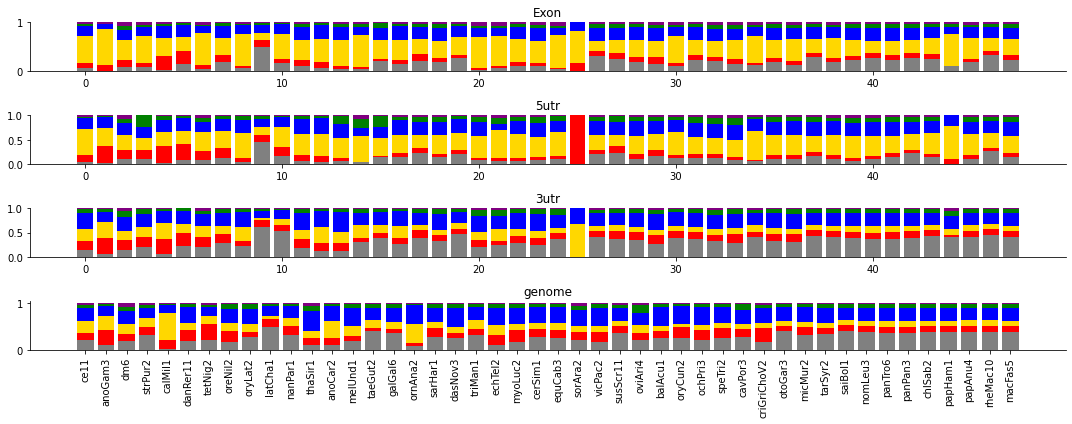

In [33]:
order = pd.read_excel("STRReview-UTRAnalysis.xlsx", sheet_name="order")

annots = ["Exon","5utr","3utr","genome"]
percolors = ["gray","red","gold","blue","green","purple"]

fig = plt.figure()
fig.set_size_inches((15, 6))

for i in range(len(annots)):
    annot = annots[i]
    
    data = pd.read_excel("STRReview-UTRAnalysis.xlsx", sheet_name=annot)
    data = data[data["name"].isin(species)]
    data = pd.merge(order, data, on=["name"])
    data = data.sort_values("order")

    ax = fig.add_subplot(4, 1, i+1)

    bottoms = np.array([0]*data.shape[0])   

    for period in range(1, 7):
        values = np.array(data["per%s.perc"%period])
        ax.bar(range(len(values)), values, color=percolors[period-1], bottom=bottoms)
        bottoms = bottoms+values
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')    
    ax.set_title(annot)
    
# only for the last one
ax.set_xticks(range(len(bottoms)))
ax.set_xticklabels(data["name"], rotation=90);
fig.tight_layout()